# T1.1: MNIST

ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [22]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import optimizers
from keras import backend as K
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras import Loss

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import os

## mnist_cnn.py

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730974659.154147  192808 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730974663.267261  192808 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730974663.2675

Epoch 1/50


I0000 00:00:1730974671.195103  551464 service.cc:146] XLA service 0x7fdccc004630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730974671.195170  551464 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-07 11:17:51.630993: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-07 11:17:52.408768: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-07 11:17:52.690083: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 66/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0728 - loss: 2.3228

I0000 00:00:1730974684.920718  551464 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.0985 - loss: 2.3067 - val_accuracy: 0.3888 - val_loss: 2.2433
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2400 - loss: 2.2372 - val_accuracy: 0.6345 - val_loss: 2.1523
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3764 - loss: 2.1536 - val_accuracy: 0.7022 - val_loss: 2.0337
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4762 - loss: 2.0366 - val_accuracy: 0.7285 - val_loss: 1.8767
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5350 - loss: 1.8877 - val_accuracy: 0.7430 - val_loss: 1.6825
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5721 - loss: 1.7169 - val_accuracy: 0.7591 - val_loss: 1.4670
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6047 - loss: 1.5323 - val_accuracy: 0.7759 - val_loss: 1.2597
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6310 - loss: 1.3734 - val_accuracy: 0.7891 - val

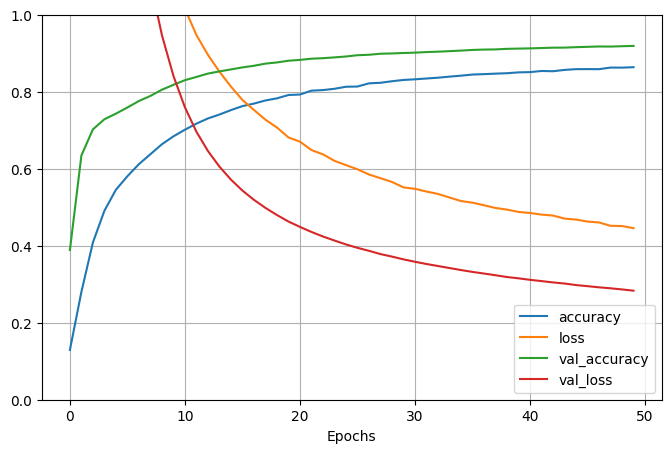

In [4]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

## mnist_mlp.py


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

In [5]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.4447

2024-11-07 11:21:05.827889: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 12 bytes spill stores, 12 bytes spill loads

2024-11-07 11:21:05.841350: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 184 bytes spill stores, 184 bytes spill loads

2024-11-07 11:21:05.868577: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 336 bytes spill stores, 288 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8595 - loss: 0.4443 - val_accuracy: 0.9662 - val_loss: 0.1080
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9658 - loss: 0.1105 - val_accuracy: 0.9738 - val_loss: 0.0849
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0752 - val_accuracy: 0.9797 - val_loss: 0.0679
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9812 - loss: 0.0583 - val_accuracy: 0.9776 - val_loss: 0.0745
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9857 - loss: 0.0450 - val_accuracy: 0.9790 - val_loss: 0.0687
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9822 - val_loss: 0.0684
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0320 - val_accuracy: 0.9843 - val_loss: 0.0655
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9909 - loss: 0.0294 - val_accuracy: 0.9826 - val_

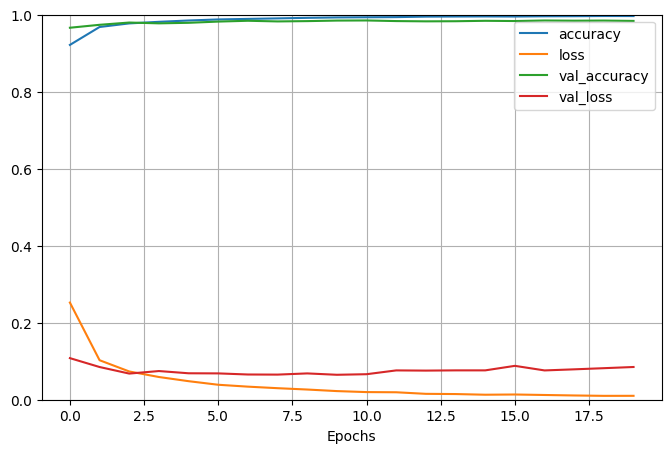

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [23]:
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser(learning_rate=learnRate),
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7437 - loss: 0.6697 - val_accuracy: 0.8616 - val_loss: 0.3763
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.3851 - val_accuracy: 0.8686 - val_loss: 0.3581
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8745 - loss: 0.3456 - val_accuracy: 0.8720 - val_loss: 0.3474
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3204 - val_accuracy: 0.8714 - val_loss: 0.3522
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8844 - loss: 0.3147 - val_accuracy: 0.8796 - val_loss: 0.3271
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8920 - loss: 0.2954 - val_accuracy: 0.8850 - val_loss: 0.3111
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8928 - loss: 0.2881 - val_accuracy: 0.8812 - val_loss: 0.3256
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8969 - loss: 0.2798 - 

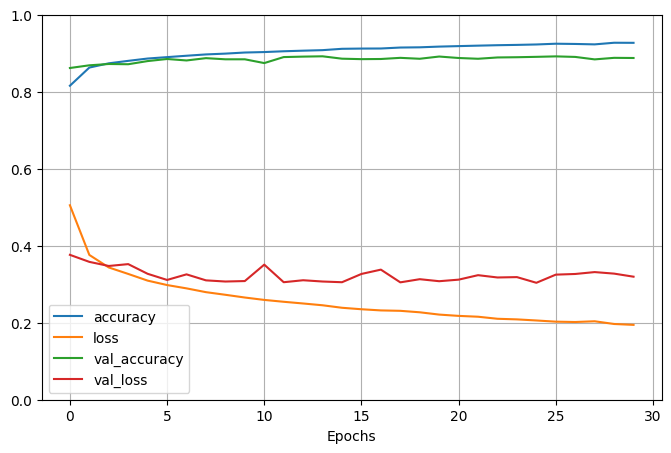

313/313 - 1s - 2ms/step - accuracy: 0.8689 - loss: 0.3913
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.adam.Adam'>
Output Activation: softplus
Hidden Activation: tanh
Alpha: 5
Epochs: 30
Test loss: 0.3912879526615143
Test accuracy: 0.8689000010490417
0.8689000010490417


In [18]:
results = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate= 0.001,
                       hiddenLayers=1,
                       optimiser=optimizers.Adam,
                       outputActivation="softplus",
                       hiddenActivation="tanh",
                       epochs=30)

print(results)

## (b) Convolutional Neural Network

In [54]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(16, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(8, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

Epoch 1/30


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5570 - loss: 1.4244 - val_accuracy: 0.7668 - val_loss: 0.6396
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7773 - loss: 0.6047 - val_accuracy: 0.8258 - val_loss: 0.4666
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8197 - loss: 0.4868 - val_accuracy: 0.8528 - val_loss: 0.4139
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8473 - loss: 0.4215 - val_accuracy: 0.8596 - val_loss: 0.3733
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8660 - loss: 0.3738 - val_accuracy: 0.8720 - val_loss: 0.3461
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8779 - loss: 0.3406 - val_accuracy: 0.8786 - val_loss: 0.3368
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3095 - val_accuracy: 0.8820 - val_loss: 0.3178
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8926 - loss: 0.2918 - val_accurac

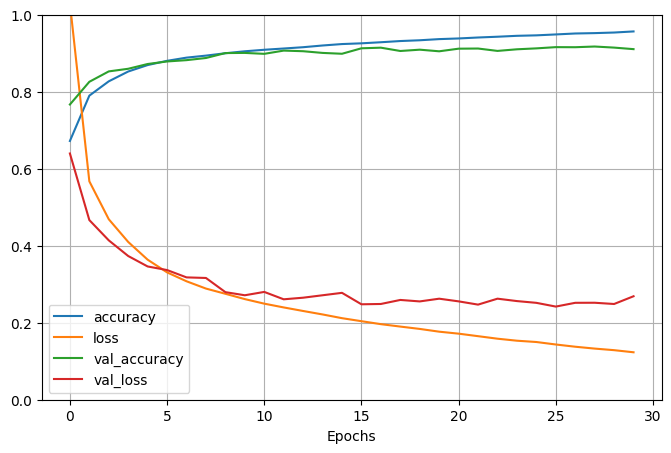

157/157 - 0s - 463us/step - accuracy: 0.9106 - loss: 0.2687
313/313 - 1s - 2ms/step - accuracy: 0.8761 - loss: 0.4101
Learning Rate: 0.001
Hidden layers: 2
Optimiser: <class 'keras.src.optimizers.adamax.Adamax'>
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Epochs: 30
Validation loss: 0.2687495946884155
Validation accuracy: 0.9106000065803528
Test loss: 0.4100642204284668
Test accuracy: 0.8761000037193298
(0.8761000037193298, 0.9106000065803528)


In [20]:
results = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate=0.001,
                       hiddenLayers=2,
                       optimiser=optimizers.Adamax,
                       outputActivation="elu",
                       hiddenActivation="sigmoid",
                       convActivation="relu",
                       epochs=30)

print(results)

In [25]:
def eval(model, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=False,
         inputShape=(28, 28, 1),
         outputShape=10,
         lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
    
    # LearnRate
    bestLearnRate = (0.1, 0, 0)
    for learnRate in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=learnRate)

        if val_acc > bestLearnRate[2]:
            bestLearnRate = (learnRate, test_acc, val_acc)

        elif val_acc < bestLearnRate[2] - 0.1:
            break

    
    # Epochs
    bestEpochs = (76, 0, 0)
    for epochs in range(1, 250, 25):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                  epochs=epochs)

        if val_acc > bestEpochs[2]:
            bestEpochs = (epochs, test_acc, val_acc)

    #    elif val_acc < bestEpochs[2] - 0.1:
    #        break


    # Optimiser
    bestOptimiser = (keras.optimizers.Adam, 0, 0)
    for optimiser in [keras.optimizers.SGD,
                    keras.optimizers.RMSprop,
                    keras.optimizers.Adam,
                    keras.optimizers.AdamW,
                    keras.optimizers.Adadelta,
                    keras.optimizers.Adagrad,
                    keras.optimizers.Adamax,
                    keras.optimizers.Adafactor,
                    keras.optimizers.Nadam,
                    keras.optimizers.Ftrl,
                    keras.optimizers.Lion]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                epochs=bestEpochs[0],
                                optimiser=optimiser)

        if val_acc > bestOptimiser[2]:
            bestOptimiser = (optimiser, test_acc, val_acc)


    # Output activation function
    bestOutActivation = ("softplus", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                outputActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestOutActivation[2]:
            bestOutActivation = (activation, test_acc, val_acc)


    # Hidden Layer activation function
    bestHiddenActivation = ("tanh", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestHiddenActivation[2]:
            bestHiddenActivation = (activation, test_acc, val_acc)

    
    # Convolutional layer Activation Function
    bestConvActivation = ("relu", 0, 0)
    if CNN:
        for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                        "tanh", "selu", "elu", "exponential"]:
            test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                             inputShape=inputShape, outputShape=outputShape,
                                             lossFunction=lossFunction,
                                             learnRate=bestLearnRate[0],
                                            outputActivation=bestOutActivation[0],
                                            hiddenActivation=bestHiddenActivation[0],
                                            convActivation=activation,
                                            epochs=bestEpochs[0],
                                            optimiser=bestOptimiser[0])

            if val_acc > bestConvActivation[2]:
                bestConvActivation = (activation, test_acc, val_acc)


    # Hidden Layers
    bestHidden = (1, 0, 0)
    accuracyList = []
    for layers in range(1, 50):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                hiddenLayers=layers,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=bestHiddenActivation[0],
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])
    
        accuracyList.append(val_acc)

        if val_acc > bestHidden[2]:
            bestHidden = (layers, test_acc, val_acc)

        elif val_acc < bestHidden[2] - 0.1:
            break


    # Regularisations
    bestAlpha = (0, 0, 0)
    #alphas = np.logspace(-10, -2, 200)
    #for alpha in alphas:
    #  test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                          hiddenLayers=bestHidden[0],
    #                          outputActivation=bestOutActivation[0],
    #                          hiddenActivation=bestHiddenActivation[0],
    #                          epochs=bestEpochs[0],
    #                          optimiser=bestOptimiser[0],
    #                          alpha=alpha)

    #  if accuracy > bestAlpha[2]:
    #   bestAlpha = (alpha, accuracy)

    print(f"Best Learning Rate: {bestLearnRate[0]}")
    print(f"Best Hidden layers: {bestHidden[0]}")
    print(f"Best Optimiser: {bestOptimiser[0]}")
    print(f"Best Output Activation: {bestOutActivation[0]}")
    print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
    print(f"Best Conv Activation: {bestConvActivation[0]}")
    print(f"Best Epochs: {bestEpochs[0]}")
    print(f"Final Val accuracy: {bestHidden[2]}")
    print(f"Final Test accuracy: {bestHidden[1]}")

    plt.figure()
    plt.plot(accuracyList, range(len(accuracyList)))
    plt.show()

    return {"bestHidden": bestHidden[0], "bestOptimiser": bestOptimiser[0],
            "bestOutActivation": bestOutActivation[0],
            "bestHiddenActivation": bestOutActivation[0],
            "bestEpochs": bestEpochs[0]}

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
bestSettings = eval(MLPModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest)
print(bestSettings)

TypeError: MLPModelTest() got an unexpected keyword argument 'inputShape'

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [117]:
# CNN model eval
bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True)
print(bestSettings)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 793/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3406 - loss: 1.8690

KeyboardInterrupt: 

### CIFAR-10

In [26]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2220 - loss: 2.0994 - val_accuracy: 0.3508 - val_loss: 1.7697
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3892 - loss: 1.6906 - val_accuracy: 0.4566 - val_loss: 1.4988
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4587 - loss: 1.4897 - val_accuracy: 0.4856 - val_loss: 1.4042
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5016 - loss: 1.3790 - val_accuracy: 0.5268 - val_loss: 1.2976
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5362 - loss: 1.2860 - val_accuracy: 0.5628 - val_loss: 1.2223
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5689 - loss: 1.2079 - val_accuracy: 0.5854 - val_loss: 1.1541
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5988 - loss: 1.1371 - val_accuracy: 0.6224 - val_loss: 1.0773
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6269 - loss: 1.0573 - 

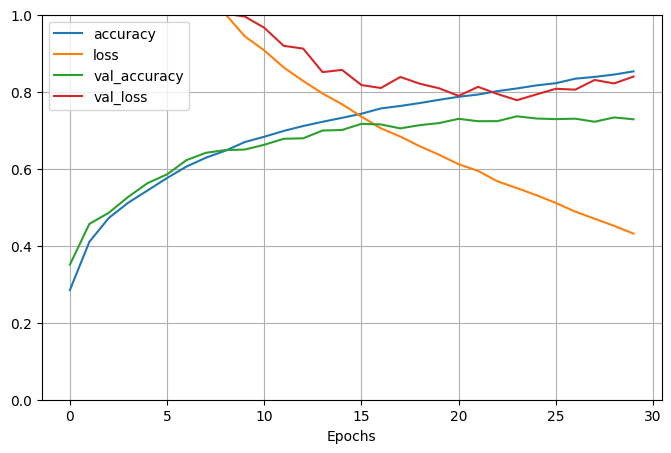

157/157 - 0s - 468us/step - accuracy: 0.7284 - loss: 0.8394
313/313 - 1s - 3ms/step - accuracy: 0.5824 - loss: 1.5894
Learning Rate: 0.001
Hidden layers: 2
Optimiser: <class 'keras.src.optimizers.adamax.Adamax'>
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Epochs: 30
Validation loss: 0.8393964767456055
Validation accuracy: 0.7283999919891357
Test loss: 1.5893725156784058
Test accuracy: 0.5824000239372253
0.5824000239372253 0.7283999919891357


In [28]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                            learnRate=0.001,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser=keras.optimizers.Adamax,
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

24 Classes

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0823 - loss: 2.6504 - val_accuracy: 0.0861 - val_loss: 2.5479
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0874 - loss: 2.5553 - val_accuracy: 0.0856 - val_loss: 2.5674
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0794 - loss: 2.5520 - val_accuracy: 0.0722 - val_loss: 2.5525
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0799 - loss: 2.5514 - val_accuracy: 0.0822 - val_loss: 2.5526
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0859 - loss: 2.5455 - val_accuracy: 0.0917 - val_loss: 2.5375
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1189 - loss: 2.4648 - val_accuracy: 0.1872 - val_loss: 2.2413
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2115 - loss: 2.1483 - val_accuracy: 0.2944 - val_loss: 1.8484
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3259 - loss: 1.7608 - val_accuracy: 0.

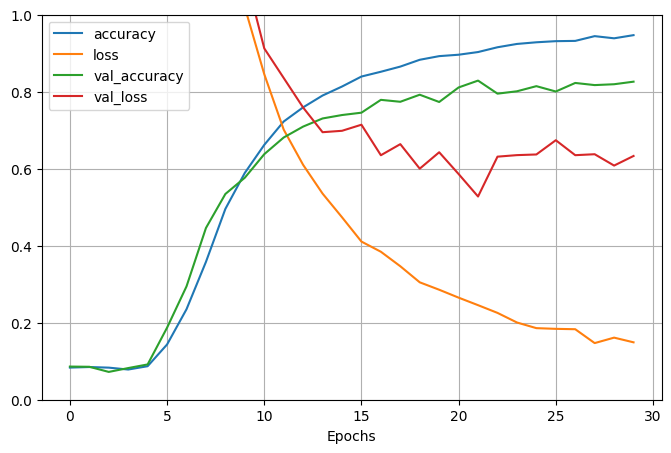

57/57 - 0s - 777us/step - accuracy: 0.8261 - loss: 0.6331
57/57 - 0s - 785us/step - accuracy: 0.8533 - loss: 0.5599
Learning Rate: 0.001
Hidden layers: 2
Optimiser: <class 'keras.src.optimizers.adam.Adam'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 30
Validation loss: 0.6331087350845337
Validation accuracy: 0.8261111378669739
Test loss: 0.5599260926246643
Test accuracy: 0.8533333539962769
0.8533333539962769 0.8261111378669739


In [33]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.001,
                                hiddenLayers=2,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=30,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=24)

print(test_acc, val_acc)

720 Classes

In [52]:
class circularLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.abs(tf.atan2(tf.sin(y_true - y_pred), tf.cos(y_true - y_pred))))

In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          learnRate=0.01,
                          hiddenLayers=6,
                          layerWidth=256,
                          outputActivation="elu",
                          hiddenActivation="elu",
                          convActivation="relu",
                          epochs=200,
                          optimiser=keras.optimizers.Adagrad,
                          inputShape=(75, 75, 1),
                          outputShape=720)
                          #lossFunction=keras.losses.cosine_similarity)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
#                    inputShape=(75, 75, 1), outputShape=720)#, lossFunction=circularLoss)
#print(bestSettings)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 4.6425e-04 - loss: 6.5950 - val_accuracy: 0.0022 - val_loss: 6.5975
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5927 - val_accuracy: 0.0000e+00 - val_loss: 6.6099
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0011 - loss: 6.5912 - val_accuracy: 5.5556e-04 - val_loss: 6.6130
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5902 - val_accuracy: 0.0011 - val_loss: 6.6090
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 5.1069e-04 - loss: 6.5891 - val_accuracy: 0.0022 - val_loss: 6.6045
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0011 - loss: 6.5884 - val_accuracy: 0.0000e+00 - val_loss: 6.6212
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0019 - loss: 6.5859 - val_accuracy: 0.0011 - val_loss: 6.6124
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0010 - los

KeyboardInterrupt: 

## (b) Regression

In [58]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0
    
xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.01,
                                hiddenLayers=50,
                                layerWidth=8,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=200,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=1,
                                lossFunction=keras.losses.mean_absolute_error)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
#                    inputShape=(75, 75, 1), outputShape=1, lossFunction=circularLoss)
#print(bestSettings)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


446/450 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0016 - loss: 5.0814

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0016 - loss: 5.0812 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 6.8454e-04 - loss: 5.0592 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0020 - loss: 5.1205 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 9.4220e-04 - loss: 5.0974 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0011 - loss: 5.0239 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 8.4934e-04 - loss: 5.0430 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0014 - loss: 5.0365 - val_accuracy: 0.0017 - val_loss: 5.1116
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0016 - loss: 5.0935 - val_acc

KeyboardInterrupt: 